# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

record_counter = 1
set_counter = 1

# Create the lists to hold relative data
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []


# Create a query url for each city in the cities list to get json response
for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

b2398e63d1cc02
Processing record 33 of set 10 | aleksandrov gay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25e9792db962de68eab2398e63d1cc02
Processing record 34 of set 10 | sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25e9792db962de68eab2398e63d1cc02
Processing record 35 of set 10 | mmabatho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25e9792db962de68eab2398e63d1cc02
Processing record 36 of set 10 | zonalnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25e9792db962de68eab2398e63d1cc02
City not found!
Processing record 37 of set 10 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25e9792db962de68eab2398e63d1cc02
Processing record 38 of set 10 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25e9792db962de68eab2398e63d1cc02
Processing record 39 of set 10 | sena madureira
http://api.openweathermap.org/data/2.5/weather?units=Im

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Max Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Max Temp      585
Lat           585
Lng           585
Wind Speed    585
dtype: int64

In [23]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Lat,Lng,Wind Speed
0,walvis bay,21,NA,1600687853,55,66.2,-22.96,14.51,4.70
1,salalah,20,OM,1600687854,83,84.2,17.02,54.09,16.11
2,nhamunda,20,BR,1600687855,62,85.1,-2.19,-56.71,3.36
3,vaini,75,TO,1600687857,88,71.6,-21.20,-175.20,8.05
4,pangnirtung,20,CA,1600687858,74,28.4,66.15,-65.71,3.11


In [24]:
#print list to csv file
weather_data.to_csv("../output_data/weather.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

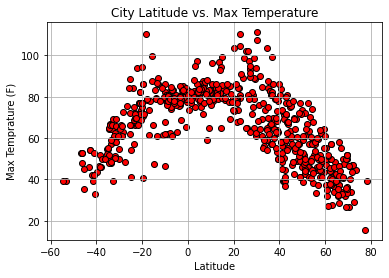

In [26]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker = "o", facecolor = "red", edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("../output_data/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

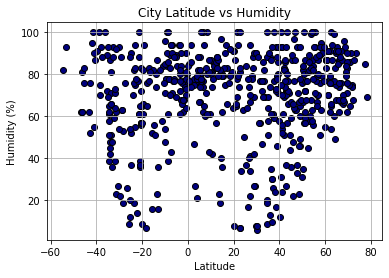

In [28]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()
plt.savefig("../output_data/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

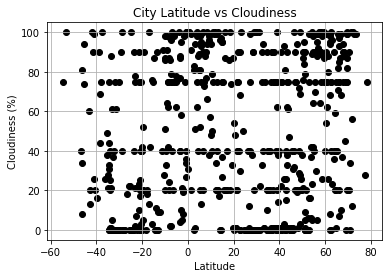

In [29]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker = "o", facecolor = "black", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()
plt.savefig("../output_data/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

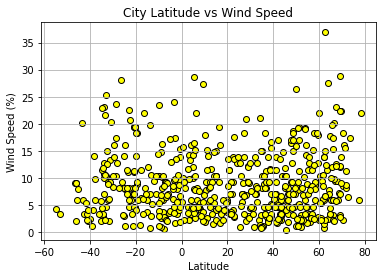

In [30]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker = "o", facecolor = "yellow", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.savefig("../output_data/windspeed.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression